# Evaluation of Linear, Lasso and Logistic Regression Models

## Setup

In [1]:
# import relevant packages
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

## Data Exploration and Preprocessing

In [2]:
# load data
bikes = pd.read_csv('bike_sharing.csv')

In [3]:
#check number of rows
num_row = bikes.shape[0]
print(num_row)

17379


In [4]:
# explore data
bikes.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [5]:
# explore data type 
bikes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
# check if there are any null values in data
bikes.isna().any().any()

False

In [7]:
# verify if values in categorical columns are correct
cat_cols = ['season', 'yr','mnth','hr','holiday','weekday','workingday','weathersit']
for col in cat_cols:
    print(f"Unique values in {col}: {bikes[col].unique()}")

Unique values in season: [1 2 3 4]
Unique values in yr: [0 1]
Unique values in mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique values in hr: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Unique values in holiday: [0 1]
Unique values in weekday: [6 0 1 2 3 4 5]
Unique values in workingday: [0 1]
Unique values in weathersit: [1 2 3 4]


In [8]:
#check if continuous values have been normalized
cont_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
for col in cont_cols:
    print(f"Summary of {col}:\n {bikes[col].describe()}\n")
    print("-"*40)

Summary of temp:
 count    17379.000000
mean         0.496987
std          0.192556
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64

----------------------------------------
Summary of atemp:
 count    17379.000000
mean         0.475775
std          0.171850
min          0.000000
25%          0.333300
50%          0.484800
75%          0.621200
max          1.000000
Name: atemp, dtype: float64

----------------------------------------
Summary of hum:
 count    17379.000000
mean         0.627229
std          0.192930
min          0.000000
25%          0.480000
50%          0.630000
75%          0.780000
max          1.000000
Name: hum, dtype: float64

----------------------------------------
Summary of windspeed:
 count    17379.000000
mean         0.190098
std          0.122340
min          0.000000
25%          0.104500
50%          0.194000
75%          0.253700
max          0.850700
Name: windsp

As seen above, there are 17379 records in the given bike-sharing dataset. There are no null values to be addressed in the dataset. The values in columns season, yr, mnth, hr, holiday, weekday, workingday and weathersit have been verified to be in the respective list of values. The continuous values in columns atemp, hum, temp and windspeed have also been normalized.

For the casual and registered values, it has been verified that the values are positive.

Since hr, mnth, weekday and season are cyclical in nature, it would be useful to encode these features using sin and cos transformations for machine learning. 

As weathersit are categorical variables that contain label values, dummy variable encoding would need to be performed to represent each category with binary variables when using linear regression model. This is to prevent the model from assuming that there is a ranked ordering between the values.  

Although yr, holiday, workingday are categorical variables, they are already binary variables. Thus, dummy variable encoding is not performed on them. 

In [9]:
#encode time as cyclical faetures
bikes['hour_sin'] = np.sin(2 * np.pi * bikes['hr']/23.0)
bikes['hour_cos'] = np.cos(2 * np.pi * bikes['hr']/23.0)

bikes['mnth_sin'] = np.sin(2 * np.pi * (bikes['mnth']-1/11.0))
bikes['mnth_cos'] = np.cos(2 * np.pi * (bikes['mnth']-1/11.0))

bikes['weekday_sin'] = np.sin(2 * np.pi * (bikes['weekday']/6.0))
bikes['weekday_cos'] = np.cos(2 * np.pi * (bikes['weekday']/6.0))

bikes['season_sin'] = np.sin(2 * np.pi * (bikes['season']-1/3.0))
bikes['season_cos'] = np.cos(2 * np.pi * (bikes['season']-1/3.0))

In [10]:
# perform dummy variable encoding on categorical variables
bikes = pd.get_dummies(bikes, columns=['weathersit'], drop_first=True)
bikes.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,temp,...,hour_cos,mnth_sin,mnth_cos,weekday_sin,weekday_cos,season_sin,season_cos,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,1,0,1,0,0,6,0,0.24,...,1.000000,-0.540641,0.841254,-2.449294e-16,1.0,-0.866025,-0.5,0,0,0
1,2,2011-01-01,1,0,1,1,0,6,0,0.22,...,0.962917,-0.540641,0.841254,-2.449294e-16,1.0,-0.866025,-0.5,0,0,0
2,3,2011-01-01,1,0,1,2,0,6,0,0.22,...,0.854419,-0.540641,0.841254,-2.449294e-16,1.0,-0.866025,-0.5,0,0,0
3,4,2011-01-01,1,0,1,3,0,6,0,0.24,...,0.682553,-0.540641,0.841254,-2.449294e-16,1.0,-0.866025,-0.5,0,0,0
4,5,2011-01-01,1,0,1,4,0,6,0,0.24,...,0.460065,-0.540641,0.841254,-2.449294e-16,1.0,-0.866025,-0.5,0,0,0


We will generate the processed data by dropping the columns instant, dteday and cnt. As instant column contains record index, it would not be able to contribute meaningfully to the subsequent regression modelling. As for dteday, useful features from the date have already been extracted, such as season, year, month, holiday, weekday and workingday. Thus, dteday would not be useful for regression modelling as well. Since cnt is a summation of the target variables casual and registered, it should also be dropped. Otherwise, there would be target leakage where the model is trained with data which would not be available when making predictions.  

In [11]:
# move casual and registered columns to the right end of the dataframe for ease of extracting the target labels
temp = bikes[['casual','registered']].copy()
bikes = bikes.drop(['casual','registered'], axis=1)
bikes = pd.concat([bikes,temp], axis=1)

# drop columns which are not needed for modelling
processed = bikes.drop(['instant','dteday','cnt', 'hr', 'mnth', 'weekday', 'season'], axis=1)

In [12]:
# view columns in processed data
processed.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'hour_sin', 'hour_cos', 'mnth_sin', 'mnth_cos', 'weekday_sin',
       'weekday_cos', 'season_sin', 'season_cos', 'weathersit_2',
       'weathersit_3', 'weathersit_4', 'casual', 'registered'],
      dtype='object')

## Split dataset into train and test 

In [13]:
np.random.seed(2021)
# split training and test data for the two target variables
train = np.random.choice([True, False], bikes.shape[0], replace = True, p = [0.8, 0.2])
x_train = processed.iloc[train, :-2]
y_train_cas = processed.iloc[train, -2]
y_train_reg = processed.iloc[train, -1]

x_test = processed.iloc[~train, :-2]
y_test_cas = processed.iloc[~train, -2]
y_test_reg = processed.iloc[~train, -1]

## Evaluate MSE and R^2 Scores of Linear Regression Models for Response Variables

In [14]:
# simple linear regression model for response variable casual
regr_cas = linear_model.LinearRegression()
regr_cas.fit(x_train, y_train_cas)
y_pred_cas = regr_cas.predict(x_test)
print("Scores for linear regression model developed for response variable 'casual'")
print(f"MSE score: {mean_squared_error(y_test_cas, y_pred_cas):.2f}")
print(f"R^2 score: {regr_cas.score(x_test,y_test_cas):.2f}")
print("-"*80)
# simple linear regression model for response variable registered
regr_reg = linear_model.LinearRegression()
regr_reg.fit(x_train, y_train_reg)
y_pred_reg = regr_reg.predict(x_test)
print("\nScores for linear regression model developed for response variable 'registered'")
print(f"MSE score: {mean_squared_error(y_test_reg, y_pred_reg):.2f}")
print(f"R^2 score: {regr_reg.score(x_test,y_test_reg):.2f}")

Scores for linear regression model developed for response variable 'casual'
MSE score: 1062.14
R^2 score: 0.58
--------------------------------------------------------------------------------

Scores for linear regression model developed for response variable 'registered'
MSE score: 13514.70
R^2 score: 0.41


If we use MSE to compare both response variables, 'casual' has a lower MSE than 'registered', which means that the model for 'casual' should be better.

If we use R^2 to compare both response variables, 'casual' has a higher R^2 value than 'registered', which means that the model for 'casual' should be better.

However, there can be instances where MSE and R^2 might appear contradictory and this is due to the way they are defined.

MSE is the average squared difference between the predicted values and the corresponding actual values as shown by the equation below. It is a measure of the quality of the estimator where values closer to zero are better. 

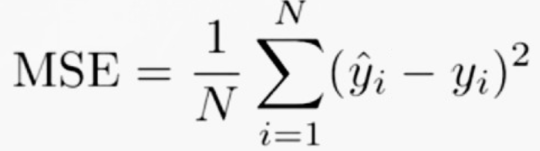


R^2 indicates the proportion of variance in the dependent variable that is predictable from the independent variables and values closer to 1 are better. As shown by the equation below, R^2 is dependent on the residual sum of squares (SS_res), which is equivalent to MSE multiplied by number of samples, and the total sum of squares (SS_tot). The total sum of squares is in turn dependent on residual sum of squares and the explained sum of squares (SS_reg). As such, R^2 differs from MSE as R^2 also considers the explained sum of squares (SS_reg). 
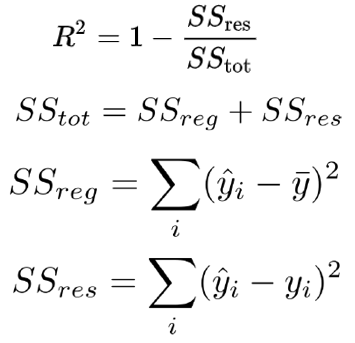


In [15]:
print("Scores for linear regression model developed for response variable 'casual'")

sse_cas = np.sum((y_pred_cas-np.mean(y_test_cas))**2)
print(f"Explained Sum of Squares(sse): {sse_cas:.2f}")

ssr_cas = mean_squared_error(y_test_cas, y_pred_cas)*len(y_test_cas)
print(f"Residual Sum of Squares(ssr): {ssr_cas:.2f}")

print(f"R^2 score computed from ssr and sse: {(sse_cas/(ssr_cas+sse_cas)):.2f}\n")

print("-"*80)

print("Scores for linear regression model developed for response variable 'registered'")

sse_reg = np.sum((y_pred_reg-np.mean(y_test_reg))**2)
print(f"Explained Sum of Squares(sse): {sse_reg:.2f}")

ssr_reg = mean_squared_error(y_test_reg, y_pred_reg)*len(y_test_reg)
print(f"Residual Sum of Squares(ssr): {ssr_reg:.2f}")

print(f"R^2 score computed from ssr and sse: {(sse_reg/(ssr_reg+sse_reg)):.2f}")

Scores for linear regression model developed for response variable 'casual'
Explained Sum of Squares(sse): 4734682.93
Residual Sum of Squares(ssr): 3664377.14
R^2 score computed from ssr and sse: 0.56

--------------------------------------------------------------------------------
Scores for linear regression model developed for response variable 'registered'
Explained Sum of Squares(sse): 31116752.37
Residual Sum of Squares(ssr): 46625720.88
R^2 score computed from ssr and sse: 0.40


As shown by the calculations above, the model for 'casual' has a relatively higher amount of explained sum of squares, leading to a higher R^2 score for 'casual' model as compared to 'registered' model.


## Impact of Regularisation on Lasso Regression Model

In [16]:
alpha = [0.001, 0.01, 0.1, 1, 10]
lasso_cas = [linear_model.Lasso(alpha = alpha[i]) for i in range(5)]
lasso_reg = [linear_model.Lasso(alpha = alpha[i]) for i in range(5)]

In [17]:
# develop lasso regression models for target variable "casual" with varying regularisation (alpha) values
for i in range(5):
    lasso_cas[i].fit(x_train,y_train_cas)
    y_pred_cas = lasso_cas[i].predict(x_test)
    mse = mean_squared_error(y_test_cas, y_pred_cas)
    cplxy = np.linalg.norm(lasso_cas[i].coef_)
    print('-' * 40)
    print('alpha =', alpha[i])
    print('MSE on test set:', mse)
    print('model complexity:', cplxy)
    print('regularized cost:', mse + alpha[i] * cplxy)

----------------------------------------
alpha = 0.001
MSE on test set: 1069.557095756034
model complexity: 88.19705212311726
regularized cost: 1069.6452928081571
----------------------------------------
alpha = 0.01
MSE on test set: 1069.5297079845475
model complexity: 87.86712123389054
regularized cost: 1070.4083791968865
----------------------------------------
alpha = 0.1
MSE on test set: 1071.200495451756
model complexity: 85.66668820039949
regularized cost: 1079.767164271796
----------------------------------------
alpha = 1
MSE on test set: 1152.8556075617191
model complexity: 77.60769060236964
regularized cost: 1230.4632981640889
----------------------------------------
alpha = 10
MSE on test set: 2167.470869073623
model complexity: 10.656281298875136
regularized cost: 2274.0336820623743


I would choose alpha = 0.001 for "casual". 

While the model complexity is the highest, choosing a small alpha would mean we are trading off model complexity for better performance. In this case, the trade off is worth it as the regularized cost is the lowest, indicating that it has the best balance between performance (in terms of MSE) and model complexity among the 5 models.

In [18]:
# develop lasso regression models for target variable "registered" with varying regularisation (alpha) values
for i in range(5):
    lasso_reg[i].fit(x_train,y_train_reg)
    y_pred_reg = lasso_reg[i].predict(x_test)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    cplxy = np.linalg.norm(lasso_reg[i].coef_)
    print('-' * 40)
    print('alpha =', alpha[i])
    print('MSE on test set:', mse)
    print('model complexity:', cplxy)
    print('regularized cost:', mse + alpha[i] * cplxy)

----------------------------------------
alpha = 0.001
MSE on test set: 13767.974738714649
model complexity: 210.73399442127445
regularized cost: 13768.18547270907
----------------------------------------
alpha = 0.01
MSE on test set: 13769.661441135506
model complexity: 195.9849952635802
regularized cost: 13771.621291088142
----------------------------------------
alpha = 0.1
MSE on test set: 13777.903455796288
model complexity: 190.90313468696613
regularized cost: 13796.993769264984
----------------------------------------
alpha = 1
MSE on test set: 13916.127809701497
model complexity: 189.1872944035696
regularized cost: 14105.315104105066
----------------------------------------
alpha = 10
MSE on test set: 16431.955767983294
model complexity: 88.94890488175957
regularized cost: 17321.44481680089


I would choose alpha = 0.001 for "registered". 

While the model complexity is the highest, choosing a small alpha would mean we are trading off model complexity for better performance. In this case, the trade off is worth it as the regularized cost is the lowest, indicating that it has the best balance between performance (in terms of MSE) and model complexity among the 5 models.

## Feature Importance from Lasso Regression Model

To determine the two attributes that are most important in the prediction of target variable, we can make use of the coefficient value of the features from the lasso models from the previous question. The application of lasso regularization would reduce the coefficient values of the features which might not be relevant in the prediction of the target variable as the strength of regularization increases.

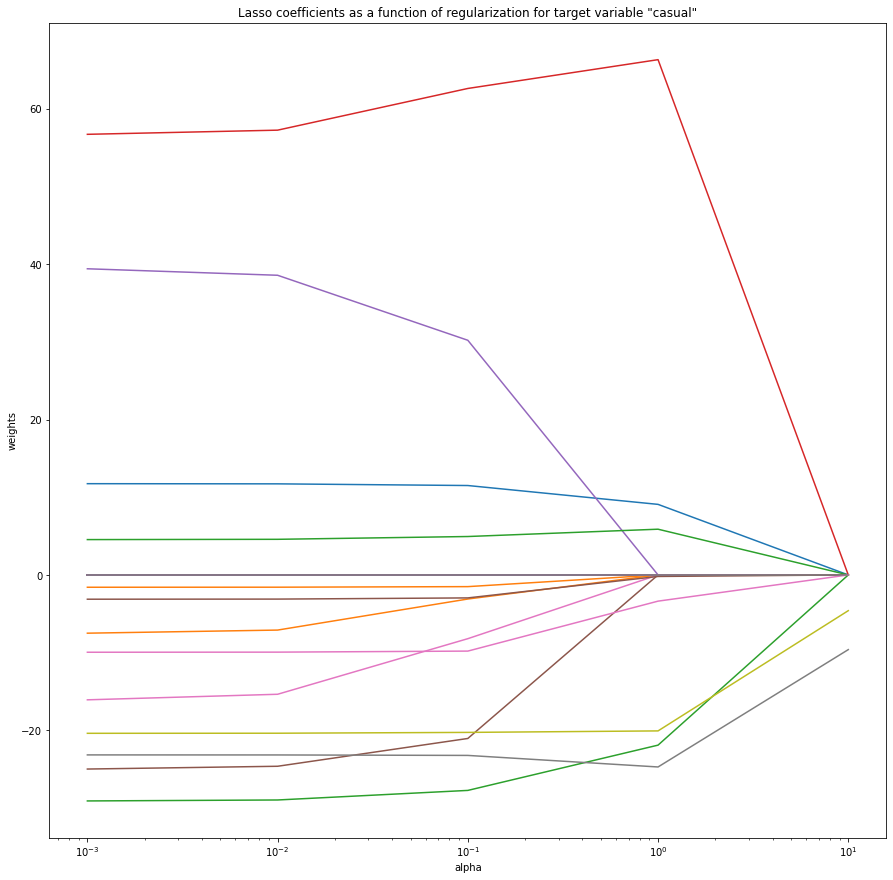

In [19]:
# plot coefficient values of variables as lasso regularisation varies for target variable "casual"
coefs = []
for i in range(5):
    coefs.append(lasso_cas[i].coef_)
plt.figure(figsize=(15,15))
ax = plt.gca()
ax.plot(alpha, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of regularization for target variable "casual"')
plt.axis('tight')
plt.show()

In [20]:
#obtain and sort the coefficient value for each feature in the lasso model for casual users at alpha = 1
features_cas = {x_train.columns[i]: abs(lasso_cas[3].coef_[i]) for i in range(len(lasso_cas[3].coef_))}
features_cas = {k: v for k, v in sorted(features_cas.items(), key=lambda item: item[1], reverse = True) if v>0}
features_cas

{'temp': 66.3337967602099,
 'hour_sin': 24.719816393065987,
 'workingday': 21.90860824983351,
 'hour_cos': 20.0774715688936,
 'yr': 9.085033913818958,
 'weekday_cos': 5.888268314534343,
 'weathersit_3': 3.3723053564422267,
 'weathersit_2': 0.19431181313443951}

Based on the plot above, we can see that there are 2 features which have significantly larger coefficients, represented by the red and grey lines, which are temp and hour_sin respectively. Lasso regression would reduce the coefficients of the irrelevant attributes as the regularisation strength increases. Lasso regression would also reduce the coefficients of variables with significant correlation. For instance, atemp and temp are correlated and Lasso Regression model has reduced the coefficient of atemp while keeping temp in the model. As such, we can use the magnitude of the coefficients as a proxy for the importance of the attributes. 

For casual users, they are likely to use the bike-sharing service for ad-hoc commutes or for sightseeing purposes. As such, comfort factor such as temperature would be important. This is because if the temperature is too cold, such as in winter, casual users might want to use alternative modes of transport as it might be difficult to cycle with snow cover or slippery paths. If they are sightseeing, warmer temperatures would be more conducive. 

Timing would likely be an important factor for casual users as they are likely to use the bike-sharing service during office hours for ad-hoc commutes or for sightseeing. 

Let's plot a contour plot to visualise how the target value "casual" vary with these 2 attributes.

In [21]:
#define linspace to capture a little bit more on the margins
def my_linspace(min_value, max_value, steps):
    diff = max_value - min_value
    return np.linspace(min_value - 0.1 * diff, max_value + 0.1 * diff, steps)

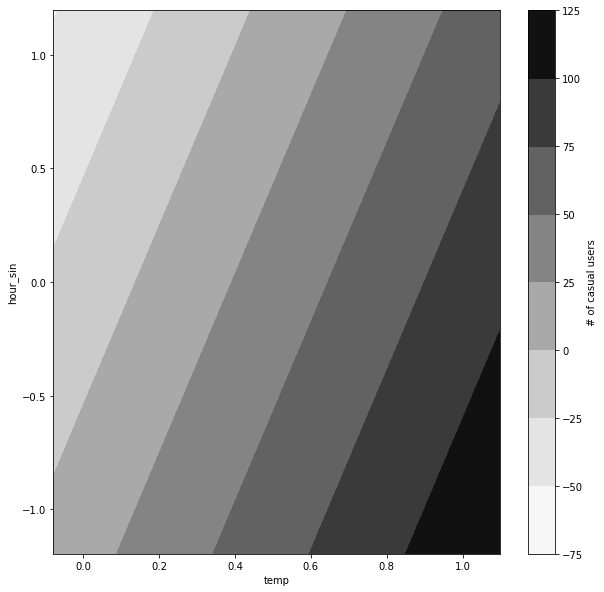

In [22]:
# lasso regression model for response variable casual using 2 chosen attributes
lasso_cas_2attributes = linear_model.Lasso(alpha=0.001)
lasso_cas_2attributes.fit(x_train[['temp','hour_sin']],y_train_cas)

# predictions made by lasso regression model using 2 chosen attributes
steps = 200
x0 = my_linspace(min(x_train['temp']), max(x_train['temp']), steps)
x1 = my_linspace(min(x_train['hour_sin']), max(x_train['hour_sin']), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]
mesh_predict = lasso_cas_2attributes.predict(mesh_data).reshape(steps, steps)

# plot of 2 chosen attributes with greyscale contours on the target value "casual"
plt.figure(figsize = (10, 10))
plt.contourf(xx0, xx1, mesh_predict, cmap = plt.cm.Greys)
plt.xlabel('temp')
plt.ylabel('hour_sin')
plt.colorbar().set_label('# of casual users')
plt.show()

Based on the contour plot above, it shows that as temp increases and in the late afternoon, the number of casual users increases. This seems sensible as casual users might be using the bikes to make short trips or to explore the city and higher temperature could mean it is sunny and suitable for them. 

Conversely, when the temperature is low, it could be during winter which might not be conducive for cycling due to the snow cover and slippery conditions. Furthermore, when the humidity is high, it would not be as comfortable to cycle as the perspiration would not evaporate as quickly.

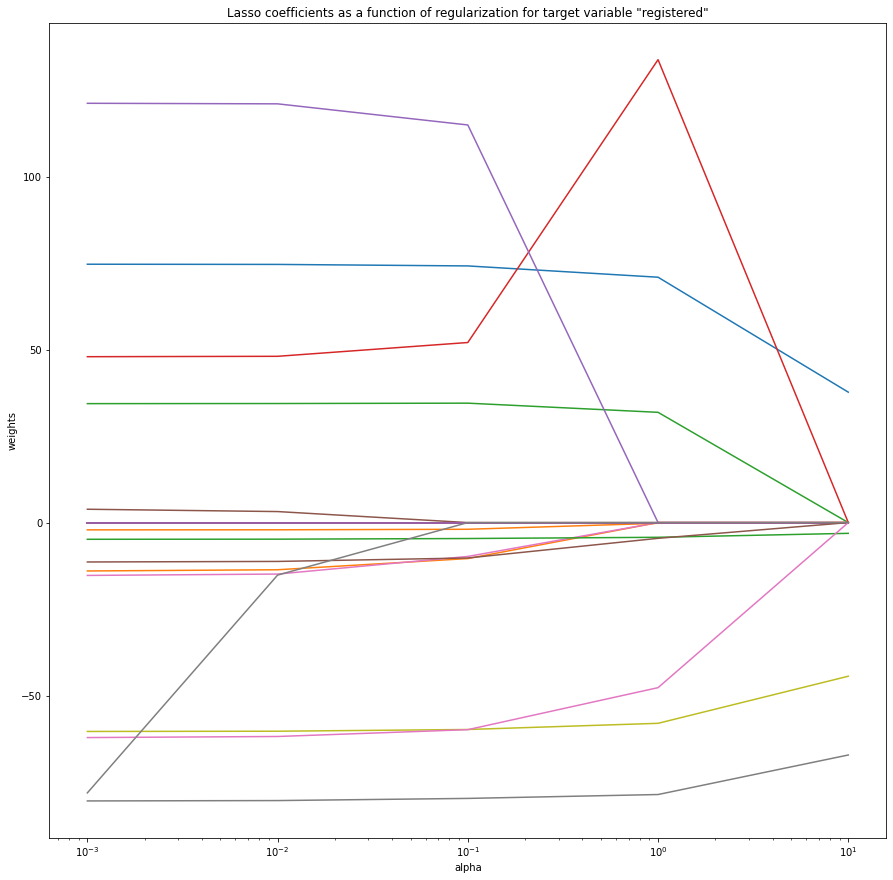

In [23]:
# plot coefficient values of variables as lasso regularisation varies for target variable "registered"
coefs = []
for i in range(5):
    coefs.append(lasso_reg[i].coef_)
plt.figure(figsize=(15,15))
ax = plt.gca()
ax.plot(alpha, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of regularization for target variable "registered"')
plt.axis('tight')
plt.show()

In [24]:
#obtain and sort the coefficient value for each feature in the lasso model for registered users using alpha = 1
features_reg = {x_train.columns[i]: abs(lasso_reg[4].coef_[i]) for i in range(len(lasso_reg[4].coef_))}
features_reg = {k: v for k, v in sorted(features_reg.items(), key=lambda item: item[1], reverse = True) if v>0} 
features_reg

{'hour_sin': 67.16127709984431,
 'hour_cos': 44.399973004773784,
 'yr': 37.6860484610619,
 'weekday_cos': 3.1104158159470328}

Based on the plot above, we can see that there are a number of features which have significantly larger coefficient even at high regularisation. Looking at the non-zero coefficients, time in general (hour_sin, hour_cos) seem to be important. 

For registered users, cycling would most likely be their main mode of transport which would encourage them to register. They are more likely to be staying in the area long-term as well. As such, time would be an important attribute for predicting registered users. For instance, there might be more demand before and after office hours. 

Let's plot a contour plot to visualise how the target value "registered" vary with these 2 attributes.

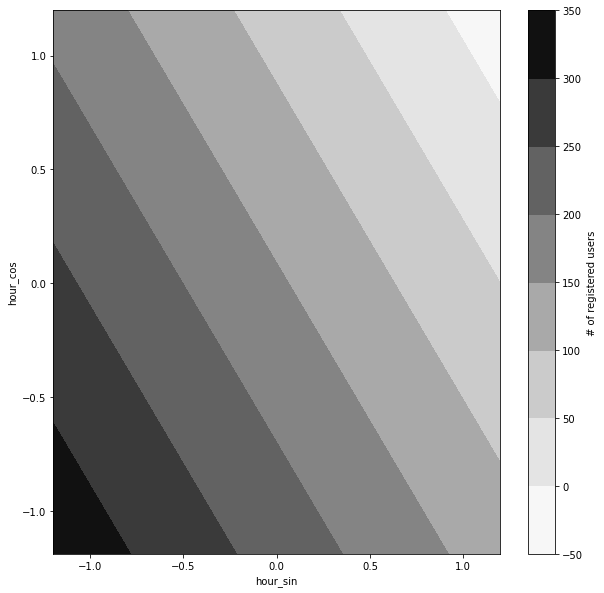

In [25]:
# lasso regression model for response variable registered using 2 chosen attributes
lasso_reg_2attributes = linear_model.Lasso(alpha=0.001)
lasso_reg_2attributes.fit(x_train[['hour_sin','hour_cos']],y_train_reg)

# predictions made by lasso regression model using 2 chosen attributes
steps = 200
x0 = my_linspace(min(x_train['hour_sin']), max(x_train['hour_sin']), steps)
x1 = my_linspace(min(x_train['hour_cos']), max(x_train['hour_cos']), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]
mesh_predict = lasso_reg_2attributes.predict(mesh_data).reshape(steps, steps)

# plot of 2 chosen attributes with greyscale contours on the target value "registered"
plt.figure(figsize = (10, 10))
plt.contourf(xx0, xx1, mesh_predict, cmap = plt.cm.Greys)
plt.colorbar().set_label('# of registered users')
plt.xlabel('hour_sin')
plt.ylabel('hour_cos')
plt.show()

Based on the contour plot above, it shows that when the timing is late morning or late afternoon, the number of registered users should increase. This seems sensible as those timings are approximately before and after office hours and the registered users would most likely choose cycling as their main mode of transportation, which is why they registered for the service, to get around. 

##  Logistic Regression

A multi-class classification model is develoepd to predict bike availabilities for walk-in customers:
1. Bike available for walk-in customers.
2. Walk-in customers need to wait up to 10 minutes for their bikes.
3. Walk-in customers need to wait up to 30 minutes for their bikes.
4. Walk-in customers need to wait more than 30 minutes, rental is not advisable.

After surveying the relationship between bike availability and the ratio of the casual rentals to registered rental, the bike rental company established this rule to label each row of data into one of the four availability categories:
- 1: Casual Users <= Registered Users/10
- 2: Registered Users/10 < Casual Users <= Registered Users/4
- 3: Registered Users/4 < Casual Users <= Registered Users/2
- 4: Casual Users > Registered Users/2

In [26]:
# develop classes for multi-class classification model
y_train = np.array([1 if y_train_cas[i] <= y_train_reg[i] / 10 else 2 if y_train_cas[i] <= y_train_reg[i] / 4 else 3 if y_train_cas[i] <= y_train_reg[i] / 2 else 4 for i in y_train_reg.index])
y_test = np.array([1 if y_test_cas[i] <= y_test_reg[i] / 10 else 2 if y_test_cas[i] <= y_test_reg[i] / 4 else 3 if y_test_cas[i] <= y_test_reg[i] / 2 else 4 for i in y_test_reg.index])

In [27]:
print(f"The size of test set: {len(y_test)}")

The size of test set: 3450


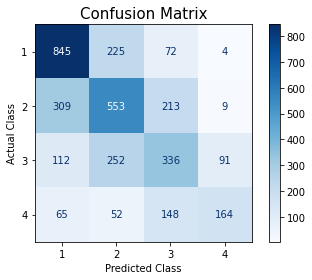

The score of the logistic regression model is 0.5501.


In [28]:
# develop logistic regression model
logregr = linear_model.LogisticRegression(solver='newton-cg', multi_class="multinomial")
logregr.fit(x_train, y_train)

# plot confusion matrix
plot_confusion_matrix(logregr, x_test, y_test, cmap = 'Blues')  
plt.ylabel('Actual Class');
plt.xlabel('Predicted Class');
plt.title("Confusion Matrix", size = 15);
plt.show()

# print score of logistic regression model
print(f"The score of the logistic regression model is {logregr.score(x_test, y_test):.4f}.")

The score function calculates the accuracy of the predictions, meaning total number of correct predictions divided by the size of the dataset. We can verify by adding up all the correct predictions (values along the diagonal of the confusion matrix) and divide by the size of the test set as shown below:

In [29]:
# calculate accuracy of predictions to verify guess
y_pred = logregr.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy of predictions is {sum(np.diag(cm))/len(y_test):.4f}")

Accuracy of predictions is 0.5501


The above calculation has confirmed that the score of a logistic regression model is the accuracy of the predictions.

## Impact of Regularisation on Logistic Regression

In [30]:
# list of parameter C values
num_C = 10
C = [1.0] * num_C
for i in range(num_C):
    C[i] = pow(10, i - 6)

In [31]:
# to store inverse log likelihood per sample
inv_log_likelihood_train = [0] * num_C
inv_log_likelihood_test = [0] * num_C

# compute inverse log likelihood per sample for each C value
for i in range(num_C):
    logregr = linear_model.LogisticRegression(solver='newton-cg', multi_class="multinomial", C=C[i])
    logregr.fit(x_train, y_train)
    #obtain log likelihoods on training data 
    log_proba_train = logregr.predict_log_proba(x_train)    
    # set error as zero
    error_train = 0
    # sum up errors on training data
    for j in range(len(log_proba_train)):
        error_train += log_proba_train[j][y_train[j]-1]
    # compute inverse log likelihood per sample for training data 
    inv_log_likelihood_train[i] = -error_train/len(x_train)
    
    #obtain log likelihoods on test data 
    log_proba_test = logregr.predict_log_proba(x_test) 
    # set error as zero
    error_test = 0
    # sum up errors on test data
    for j in range(len(log_proba_test)):
        error_test += log_proba_test[j][y_test[j]-1]
    # compute inverse log likelihood per sample for test data 
    inv_log_likelihood_test[i] = -error_test/len(x_test)

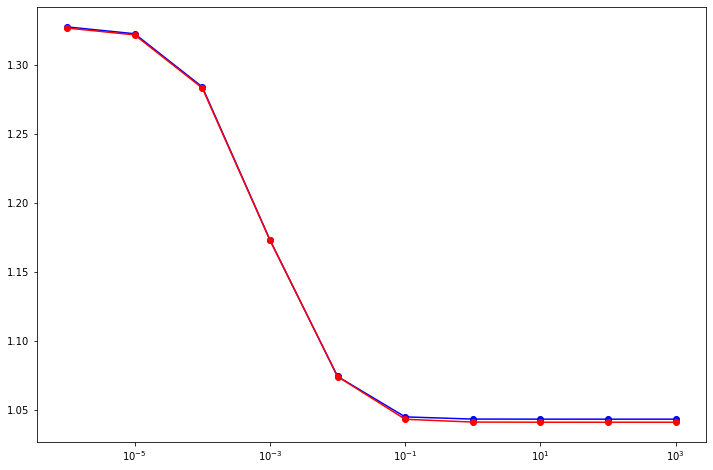

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
plt.xscale('log')
plt.plot(C, inv_log_likelihood_train, 'bo-', C, inv_log_likelihood_test, 'ro-')
plt.show()

The C parameter for Logistic Regression represents the inverse of regularisation strength, meaning smaller values specify stronger regularization. 

From the graph plotted, both train and test errors generally increase with increasing regularisation strength. This is because as regularisation increases, the model is forced to be simpler to minimise overfitting. Thus, this would cause the error to increase with increasing regularisation strength. 

When C is between 10^-2 to 10^3, test error is generally higher than train error. This is because the regularisation strength is lower and the model is likely to be overfitting on the training dataset, resulting in higher losses on the test dataset. When C is between 10^-6 to 10^-3, train and test errors are generally similar. This is because the regularisation strength is higher and the model is forced to be simpler to minimise overfitting on the training dataset, resulting in comparable losses on the test dataset. 

There is significant change in train and test errors when C is between 10^-4 and 10^-1. This could be due to the regularisation strength being insignificant when C is more than 10^-1 and the regularisation reaching its full strength when C is less than 10^-4.

## Drawback of MSE

The drawback with the regression model developed in question 1 is that it tries to minimise MSE (shown in equation below), which does not take into consideration the significance of the error relative to the predicted value. 

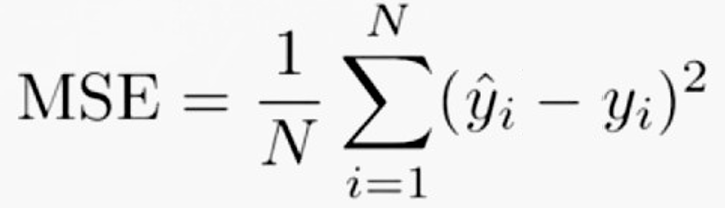
For example, an error of 2 when predicting a value around 10 should be more significant than an error of 2 when predicting a value around 1000, however both errors would have the same amount of contribution to MSE as shown in the table below.

|True Value|Predicted Value|MSE Loss|
| -------- | ----------- | ----------- |
| 10      | 12       |   4   |  
| 1000   | 1002        |   4   | 

Various improvements are explored below and the different regression models are developed accordingly.

### Improvement 1: Square Root Transformation

A possible improvement would be to perform square root transformation on the target values. The loss function would then be:

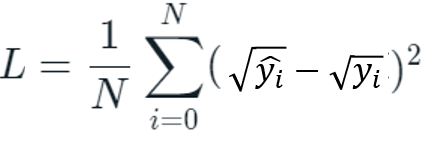

As shown below, for the same error, the loss is more significant when the predicted value is low. 

|True Value|Predicted Value|MSE Loss| Loss after Square Root Transformation|
| -------- | ----------- | ----------- | ----------- |
| 10      | 12       |   4   |   9.11e-2  |
| 1000   | 1002        |   4   |  9.99e-4  |

Since linear regression model in sk-learn uses Ordinary Least Squares to minimise the residual sum of squares, we can easily use it to minimise the residual sum of squares of the square-rooted values by performing square root transformation on the target values.

In [33]:
# perform square root transformation on target variables
y_train_cas_sqrt = y_train_cas**(1/2)
y_train_reg_sqrt = y_train_reg**(1/2)
y_test_cas_sqrt = y_test_cas**(1/2)
y_test_reg_sqrt = y_test_reg**(1/2)

# linear regression model for response variable casual after square root transformation
regr_cas_sqrt = linear_model.LinearRegression()
regr_cas_sqrt.fit(x_train, y_train_cas_sqrt)
y_pred_cas_sqrt = regr_cas_sqrt.predict(x_test)
print("Scores for linear regression model developed for response variable 'casual'")
print(f"Loss score: {mean_squared_error(y_test_cas_sqrt, y_pred_cas_sqrt):.2f}")
print(f"R^2 score: {regr_cas_sqrt.score(x_test,y_test_cas_sqrt):.2f}")

# linear regression model for response variable registered after square root transformation
regr_reg_sqrt = linear_model.LinearRegression()
regr_reg_sqrt.fit(x_train, y_train_reg_sqrt)
y_pred_reg_sqrt = regr_reg_sqrt.predict(x_test)
print("\nScores for linear regression model developed for response variable 'registered'")
print(f"Loss score: {mean_squared_error(y_test_reg_sqrt, y_pred_reg_sqrt):.2f}")
print(f"R^2 score: {regr_reg_sqrt.score(x_test,y_test_reg_sqrt):.2f}")

Scores for linear regression model developed for response variable 'casual'
Loss score: 3.45
R^2 score: 0.74

Scores for linear regression model developed for response variable 'registered'
Loss score: 16.99
R^2 score: 0.53


By using square root transformation on the target variables, R^2 for model developed for response variable 'casual' improved from 0.56 (in section 4) to 0.74.

Likewise, R^2 for model developed for response variable 'registered' improved from 0.4 (in section 4) to 0.53.

### Improvement 2: Cube Root Transformation

Another possible improvement would be to perform cube root transformation on the target values. The loss function would then be:

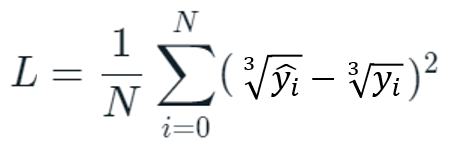

As shown below, for the same error, the loss is more significant when the predicted value is low. 

|True Value|Predicted Value|MSE Loss| Loss after Cube Root Transformation|
| -------- | ----------- | ----------- | ----------- |
| 10      | 12       |   4   |   1.82e-2  |
| 1000   | 1002        |   4   |  4.44e-5  |

After cube root transformation, the difference in loss for the 2 cases shown in the table above is 3 orders of magnitude, which is 1 order of magnitude greater than after square root transformation. This means that the significance of the error when the predicted value is small is greater.

Since linear regression model in sk-learn uses Ordinary Least Squares to minimise the residual sum of squares, we can easily use it to minimise the residual sum of squares of the cube-rooted values by performing cube root transformation on the target values.

In [34]:
# perform square root transformation on target variables
y_train_cas_cbrt = y_train_cas**(1/3)
y_train_reg_cbrt = y_train_reg**(1/3)
y_test_cas_cbrt = y_test_cas**(1/3)
y_test_reg_cbrt = y_test_reg**(1/3)

# linear regression model for response variable casual after cube root transformation
regr_cas_cbrt = linear_model.LinearRegression()
regr_cas_cbrt.fit(x_train, y_train_cas_cbrt)
y_pred_cas_cbrt = regr_cas_cbrt.predict(x_test)
print("Scores for linear regression model developed for response variable 'casual'")
print(f"Loss score: {mean_squared_error(y_test_cas_cbrt, y_pred_cas_cbrt):.2f}")
print(f"R^2 score: {regr_cas_cbrt.score(x_test,y_test_cas_cbrt):.2f}")

# linear regression model for response variable registered after cube root transformation
regr_reg_cbrt = linear_model.LinearRegression()
regr_reg_cbrt.fit(x_train, y_train_reg_cbrt)
y_pred_reg_cbrt = regr_reg_cbrt.predict(x_test)
print("\nScores for linear regression model developed for response variable 'registered'")
print(f"Loss score: {mean_squared_error(y_test_reg_cbrt, y_pred_reg_cbrt):.2f}")
print(f"R^2 score: {regr_reg_cbrt.score(x_test,y_test_reg_cbrt):.2f}")

Scores for linear regression model developed for response variable 'casual'
Loss score: 0.55
R^2 score: 0.75

Scores for linear regression model developed for response variable 'registered'
Loss score: 1.56
R^2 score: 0.55


By using cube root transformation on the target variables, R^2 for model developed for response variable 'casual' improved from 0.74 (in square root transformation) to 0.75.

Likewise, R^2 for model developed for response variable 'registered' improved from 0.53 (in square root transformation) to 0.55.


### Improvement 3: Log Transformation
To account for the significance of the error relative to the true value, we can consider performing a log transformation on the target values to obtain the following loss function instead as shown below. 

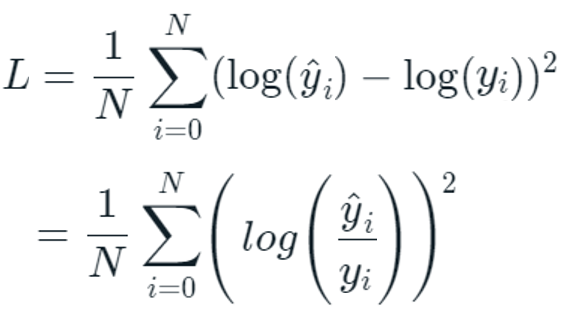

With log transformation on the target values, the formula to calculate the loss would simplify into a ratio of the true and predicted value due to logarithmic property as shown above. With this ratio, the loss function would be able to account for the relative difference between the true and predicted value.

However, there is a limitation with the above improvement as it is possible for the predicted value to be zero and log(zero) is not defined. To overcome this, a value of 1 is also added to both predicted and true values as shown below, to ensure the equation can be solved. 

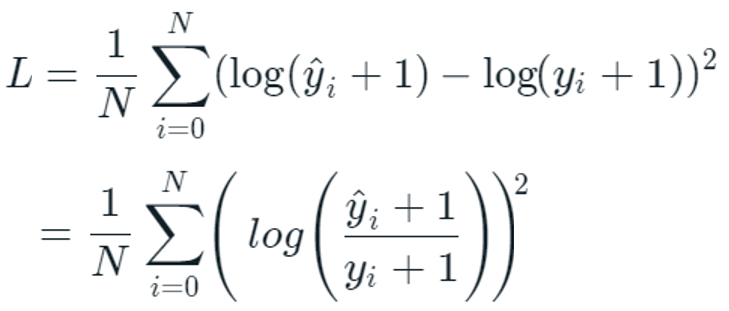
The above loss function is also known as Mean Squared Logarithmic Error (MSLE). Based on the table below, it can be seen that MSLE is able to account for the relative difference between the true and predicted value, where the error of 2 when the true value is 10 is more significant as compared to an error of 2 when the true value is much larger.

|True Value|Predicted Value|MSE Loss|MSLE Loss|
| -------- | ----------- | ----------- | ----------- |
| 10      | 12       |   4   |   5.26e-3  |
| 1000   | 1002        |   4   |  7.51e-7  |

After log transformation, the difference in loss for the 2 cases shown in the table above is 4 orders of magnitude, which is 1 order of magnitude greater than after cube root transformation. This means that the significance of the error when the predicted value is small is greater.

Since linear regression model in sk-learn uses Ordinary Least Squares to minimise the residual sum of squares, we can easily use it to minimise the residual sum of squares of the log values by performing log transformation on the target values. 

In [35]:
# perform log(1+x) transformation on target variables
y_train_cas_log = np.log1p(y_train_cas)
y_train_reg_log = np.log1p(y_train_reg)
y_test_cas_log = np.log1p(y_test_cas)
y_test_reg_log = np.log1p(y_test_reg)

# linear regression model for response variable casual after log transformation
regr_cas_log = linear_model.LinearRegression()
regr_cas_log.fit(x_train, y_train_cas_log)
y_pred_cas_log = regr_cas_log.predict(x_test)
print("Scores for linear regression model developed for response variable 'casual'")
print(f"MSLE score: {mean_squared_error(y_test_cas_log, y_pred_cas_log):.2f}")
print(f"R^2 score: {regr_cas_log.score(x_test,y_test_cas_log):.2f}")

# linear regression model for response variable registered after log transformation
regr_reg_log = linear_model.LinearRegression()
regr_reg_log.fit(x_train, y_train_reg_log)
y_pred_reg_log = regr_reg_log.predict(x_test)
print("\nScores for linear regression model developed for response variable 'registered'")
print(f"MSLE score: {mean_squared_error(y_test_reg_log, y_pred_reg_log):.2f}")
print(f"R^2 score: {regr_reg_log.score(x_test,y_test_reg_log):.2f}")

Scores for linear regression model developed for response variable 'casual'
MSLE score: 0.58
R^2 score: 0.74

Scores for linear regression model developed for response variable 'registered'
MSLE score: 0.84
R^2 score: 0.55
